In [21]:
from pathlib import Path
import numpy as np
from scipy import constants as C
from mmwave.rma import rma, echo_plot
from mmwave.util import load_frame

In [22]:
output_dir = Path("/home/tomin/python/mmwave_postproc/cast_data/small_gun_241121")

frame_file, cfg = load_frame(output_dir)

num_sample = cfg.mimo.profile.numAdcSamples
adcStartTime = cfg.mimo.profile.adcStartTime  # us
startFrequency = cfg.mimo.profile.startFrequency * 1e9
K = cfg.mimo.profile.frequencySlope * 1e12  # Slope const (hz/s)
Fs = cfg.mimo.profile.adcSamplingFrequency * 1e3  # Sampling rate (sps)

F0 = startFrequency + adcStartTime * K * 1e-6 + num_sample // 2 / Fs * K  # Center frequency

dx = cfg.bracket.profile.dx
dy = cfg.bracket.profile.dy  # Sampling distance at x (horizontal) y (vertical) axis in mm
row = cfg.bracket.profile.row
col = cfg.bracket.profile.col

c = C.c
Ts = 1 / Fs  # Sampling period
k = 2 * np.pi * F0 / c  # Wave number
print(f"k:{k}")

k:1650.241530893403


In [23]:
tx_idx = 0
rx_idx = 0

Echo = frame_file[rx_idx, tx_idx, :, :, :, 0] + 1j * frame_file[rx_idx, tx_idx, :, :, :, 1]

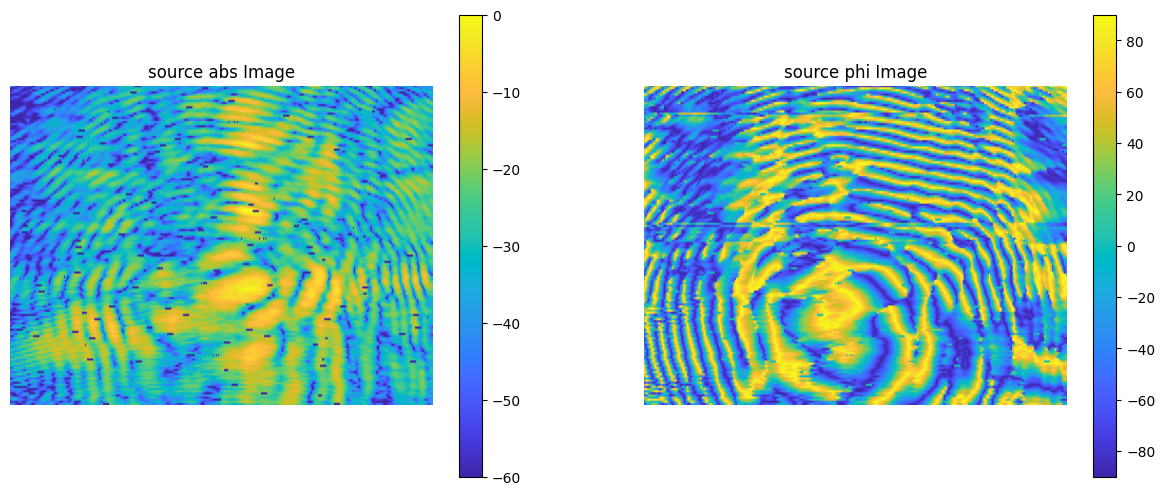

In [24]:
ID_select = 21
nFFTtime = num_sample  # Number of FFT points for Spatial-FFT
tI = 183  # mm

R = c / 2 * (ID_select / (K * Ts * nFFTtime)) - tI / 1000
Sr: np.ndarray = np.fft.fft(Echo)
Sr = Sr[:, :, ID_select - 1]
Sr[Sr == 0] = 1e-10
echo_plot(Sr, "source", dx, dy)

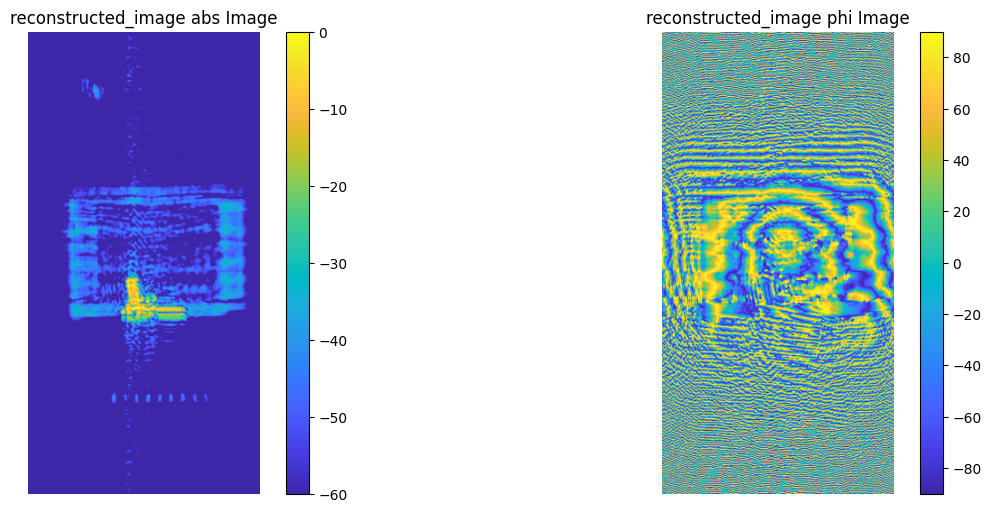

In [25]:
reconstructed_image = rma(Sr, dx, dy, R, k)
echo_plot(reconstructed_image, "reconstructed_image", dx, dy, rma=True)